In [3]:
from keras.preprocessing import image
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

import numpy as np


Using TensorFlow backend.


In [6]:
import pandas as pd
df=pd.read_csv("micrograph.csv")

In [7]:
df.head()
cols=df.columns
print(cols)
print(cols)
print('size',df.size,'length',len(df))
df[cols[1]][0]

Index(['micrograph_id', 'path', 'micron_bar', 'micron_bar_units',
       'micron_bar_px', 'magnification', 'detector', 'sample_key',
       'contributor_key', 'primary_microconstituent'],
      dtype='object')
Index(['micrograph_id', 'path', 'micron_bar', 'micron_bar_units',
       'micron_bar_px', 'magnification', 'detector', 'sample_key',
       'contributor_key', 'primary_microconstituent'],
      dtype='object')
size 9610 length 961


'micrograph1.tif'

In [8]:
base_model=VGG16(weights='imagenet',include_top=False)
model=Model(input=base_model.input,output=[base_model.get_layer('block1_pool').output,base_model.get_layer('block2_pool').output,base_model.get_layer('block3_pool').output,base_model.get_layer('block4_pool').output,base_model.get_layer('block5_pool').output])

feat=[]
for i in range(0,len(df[cols[1]])):
    feat.append([])


#try extracting features from a single image
for image_i in range(0,len(df[cols[1]])):
    img_path=df[cols[1]][image_i]
    img=image.load_img(img_path)
    x=image.img_to_array(img)
    x=x[0:484,:,:] #crop the bottom subtitles
    x=np.expand_dims(x,axis=0)
    x=preprocess_input(x)
    print('image',image_i)
    
    block_poolfeat=model.predict(x)
    
    #print('elements in feature list',len(block_poolfeat))
    #for i in range(0,5):
        #print(block_poolfeat[i][0][0][0][0])
        #print(block_poolfeat[i].shape)
    #find mean across channels
    for block in range(0,5):
        s=block_poolfeat[block].shape
        tot=0
        for i in range(0,s[0]):
            for j in range(0,s[1]):
                for k in range(0,s[2]):
                    tot+=block_poolfeat[block][i][j][k]
        feat[image_i].append(tot/(s[0]*s[1]*s[2]))
        #print(feat[block].shape,'block',block+1,'feature vector shape')

/home/akshay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  


image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [9]:
len(feat)

961

In [10]:
df[cols[9]][0]

'pearlite'

In [11]:
# Store the features
#/media/akshay/OS/Users/aksha/OneDrive - Texas A&M University/Documents/TAMU/Fall 18/660/MSEN660/Programming/Project 4/
feat_backup=feat
import pickle
filename="feat.pickle"
with open (filename,'wb') as f:
    pickle.dump(feat,f)


In [12]:
with open(filename, 'rb') as f:
    feat = pickle.load(f)
len(feat)

961

In [13]:
y=[]
x_i=[]
for i in range(0,len(df[cols[9]])):
    if df[cols[9]][i]=='spheroidite':
        y.append(0)
        x_i.append(i)
    elif df[cols[9]][i]=='network':
        y.append(1)
        x_i.append(i)
    elif df[cols[9]][i]=='pearlite':
        y.append(2)
        x_i.append(i)
    elif df[cols[9]][i]=='spheroidite+widmanstatten':
        y.append(3)
        x_i.append(i)
    elif df[cols[9]][i]=='pearlite+spheroidite':
        y.append(4)
        x_i.append(i)
    elif df[cols[9]][i]=='pearlite+widmanstatten':
        y.append(5)
        x_i.append(i)
    elif df[cols[9]][i]=='martensite':
        y.append(6)
        x_i.append(i)
    else:
        pass
print(len(y),y[0:10],len(x_i),x_i[0:10])

961 [2, 0, 4, 2, 0, 3, 1, 1, 0, 0] 961 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [14]:
#training data

In [15]:
#pairwise combinations of labelled data
from itertools import combinations
combs=list(combinations([0,1,2,3],2))
print(combs)
enc={0:'spheroidite',1:'network',2:'pearlite',3:'spheroidite+widmanstatten',4:'pearlite+spheroidite',5:'pearlite+widmanstatten',6:'martensite'}

from sklearn.svm import SVC
model1=SVC(gamma='auto',kernel='rbf')

layers=np.zeros(len(combs))
layer_score=np.zeros([len(combs),5])
layer_testscore=np.zeros([len(combs),5])
com_count=0
import pdb

test_score=np.zeros(len(combs))
models=[]

for com in combs:
    
    #training set
    X_train=[]
    Y_train=[]
    X_test=[]
    Y_test=[]
    print (com)
    for labdata in com:
        if labdata==0:
            count=0
            i=0
            
            while(count<100):
                if y[i]==0 :
                    X_train.append(feat[x_i[i]])
                    Y_train.append(0)
                    count+=1
                i+=1
            while(i<761):
                if y[i]==0 :
                    X_test.append(feat[x_i[i]])
                    Y_test.append(0)
                i+=1
        if labdata==1:
            count=0
            i=0
            
            while(count<100):
                if y[i]==1 :
                    X_train.append(feat[x_i[i]])
                    Y_train.append(1)
                    count+=1
                i+=1
            while(i<761):
                if y[i]==1 :
                    X_test.append(feat[x_i[i]])
                    Y_test.append(1)
                i+=1
        if labdata==2:
            count=0
            i=0
            
            while(count<100):
                if y[i]==2 :
                    X_train.append(feat[x_i[i]])
                    Y_train.append(2)
                    count+=1
                i+=1
            while(i<761):
                if y[i]==2 :
                    X_test.append(feat[x_i[i]])
                    Y_test.append(2)
                i+=1
        if labdata==3:
            count=0
            i=0
            
            while(count<60):
                if y[i]==3 :
                    X_train.append(feat[x_i[i]])
                    Y_train.append(3)
                    count+=1
                i+=1
            while(i<761):
                if y[i]==3 :
                    X_test.append(feat[x_i[i]])
                    Y_test.append(3)
                i+=1
    #pdb.set_trace()
    #for layer in range(0,5):
    model=SVC(gamma='auto',kernel='rbf')            

    #kfolds for each layer
    from sklearn.model_selection import KFold

    kf=KFold(n_splits=10,shuffle=True)
    avgscore=np.zeros(5)
    testscore=np.zeros(5)
    #cross validation 10 fold 
    for train_index,test_index in kf.split(X_train):
        x_train=[]
        x_test=[]
        y_train=[]
        y_test=[]
        
        for i in train_index:
            x_train.append(X_train[i])
            y_train.append(Y_train[i])
        for j in test_index:
            x_test.append(X_train[j])
            y_test.append(Y_train[j])
                
        for layer in range(0,5):
            x_train1=[]
            x_test1=[]
            for i in range(0,len(x_train)):
                x_train1.append(x_train[i][layer])
            for i in range(0,len(x_test)):
                x_test1.append(x_test[i][layer])

            model.fit(x_train1,y_train)
            sco=model.score(x_test1,y_test)
            avgscore[layer]+=sco
    
    #layer 5 performs best for all pairs of labels
    #first train the 6 pairwise models based on best layer
    y_train=[]
    for i in range (0,len(Y_train)):
        y_train.append(Y_train[i])
    x_train=[]
    for i in range (0,len(X_train)):
        x_train.append(X_train[i][4])
        
    models.append(model.fit(x_train,y_train))
        
    avgscore=avgscore/10
    layer_score[com_count,:]=avgscore
    #pdb.set_trace()            
    com_count+=1
        
    

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)


In [16]:
layer_score[0]

array([ 0.4  ,  0.4  ,  0.4  ,  0.405,  0.955])

In [17]:
for i in range(0,6):
    print ('Pairwise Classifier',i+1,'-',enc[combs[i][0]],'vs',enc[combs[i][1]])
    for j in range(0,5):
        print('Layer ',j+1,'10 Fold CV Score:',layer_score[i][j])

Pairwise Classifier 1 - spheroidite vs network
Layer  1 10 Fold CV Score: 0.4
Layer  2 10 Fold CV Score: 0.4
Layer  3 10 Fold CV Score: 0.4
Layer  4 10 Fold CV Score: 0.405
Layer  5 10 Fold CV Score: 0.955
Pairwise Classifier 2 - spheroidite vs pearlite
Layer  1 10 Fold CV Score: 0.42
Layer  2 10 Fold CV Score: 0.42
Layer  3 10 Fold CV Score: 0.42
Layer  4 10 Fold CV Score: 0.43
Layer  5 10 Fold CV Score: 0.975
Pairwise Classifier 3 - spheroidite vs spheroidite+widmanstatten
Layer  1 10 Fold CV Score: 0.625
Layer  2 10 Fold CV Score: 0.625
Layer  3 10 Fold CV Score: 0.625
Layer  4 10 Fold CV Score: 0.625
Layer  5 10 Fold CV Score: 0.78125
Pairwise Classifier 4 - network vs pearlite
Layer  1 10 Fold CV Score: 0.415
Layer  2 10 Fold CV Score: 0.41
Layer  3 10 Fold CV Score: 0.41
Layer  4 10 Fold CV Score: 0.415
Layer  5 10 Fold CV Score: 0.975
Pairwise Classifier 5 - network vs spheroidite+widmanstatten
Layer  1 10 Fold CV Score: 0.625
Layer  2 10 Fold CV Score: 0.625
Layer  3 10 Fold CV

In [18]:
#now obtain test errors for pairwise classifiers 
#pairwise combinations of labelled data
test_err=np.zeros(4)
from sklearn.svm import SVC
com_count=0
x_train1v1=[]
x_test1v1=[]
y_train1v1=[]
y_test1v1=[]
enc={0:'spheroidite',1:'network',2:'pearlite',3:'spheroidite+widmanstatten',4:'pearlite+spheroidite',5:'pearlite+widmanstatten',6:'martensite'}

for label in range(4):
    
    #training set
    X_train=[]
    Y_train=[]
    X_test=[]
    Y_test=[]
    
    if label==0:
        count=0
        i=0

        while(count<100):
            if y[i]==0 :
                X_train.append(feat[x_i[i]])
                x_train1v1.append(feat[x_i[i]])
                y_train1v1.append(0)
                Y_train.append(0)
                count+=1
            i+=1
        while(i<len(y)):
            if y[i]==0 :
                X_test.append(feat[x_i[i]])
                Y_test.append(0)
                x_test1v1.append(feat[x_i[i]])
                y_test1v1.append(0)
            i+=1
    if label==1:
        count=0
        i=0

        while(count<100):
            if y[i]==1 :
                X_train.append(feat[x_i[i]])
                x_train1v1.append(feat[x_i[i]])
                Y_train.append(1)
                y_train1v1.append(1)
                count+=1
            i+=1
        while(i<len(y)):
            if y[i]==1 :
                X_test.append(feat[x_i[i]])
                Y_test.append(1)
                x_test1v1.append(feat[x_i[i]])
                y_test1v1.append(1)
            i+=1
    if label==2:
        count=0
        i=0

        while(count<100):
            if y[i]==2 :
                X_train.append(feat[x_i[i]])
                x_train1v1.append(feat[x_i[i]])
                Y_train.append(2)
                y_train1v1.append(2)
                count+=1
            i+=1
        while(i<len(y)):
            if y[i]==2 :
                X_test.append(feat[x_i[i]])
                Y_test.append(2)
                x_test1v1.append(feat[x_i[i]])
                y_test1v1.append(2)
            i+=1
    if label==3:
        count=0
        i=0

        while(count<60):
            if y[i]==3 :
                X_train.append(feat[x_i[i]])
                x_train1v1.append(feat[x_i[i]])
                Y_train.append(3)
                y_train1v1.append(3)
                count+=1
            i+=1
        while(i<len(y)):
            if y[i]==3 :
                X_test.append(feat[x_i[i]])
                Y_test.append(3)
                x_test1v1.append(feat[x_i[i]])
                y_test1v1.append(3)
            i+=1
    #pdb.set_trace()
    #for layer in range(0,5):
    y_test=[]
    for i in range (0,len(Y_test)):
        y_test.append(Y_test[i])
    x_test=[]
    for i in range (0,len(X_test)):
        x_test.append(X_test[i][4])
    
    model=SVC(gamma='auto',kernel='rbf')            
    sco=[]
    count=0
    for i in range(0,len(combs)):
        if label in combs[i]:
            sco.append(models[i].score(x_test,y_test))
            pair1=combs[i][0]
            pair2=combs[i][1]
            print ('Pair wise Classifier',enc[pair1],'vs',enc[pair2],'for',enc[label],':')
            print('Score',sco[count])
            count+=1
    #pdb.set_trace()
    
    test_err[label]=((sco[0]+sco[1]+sco[2])/3)
    #pdb.set_trace()            
    
    com_count+=1
    
    print ('Pair wise Classifiers Average score for',enc[label],':')
    print(test_err[label])
        
    

Pair wise Classifier spheroidite vs network for spheroidite :
Score 0.992700729927
Pair wise Classifier spheroidite vs pearlite for spheroidite :
Score 1.0
Pair wise Classifier spheroidite vs spheroidite+widmanstatten for spheroidite :
Score 0.967153284672
Pair wise Classifiers Average score for spheroidite :
0.986618004866
Pair wise Classifier spheroidite vs network for network :
Score 0.901785714286
Pair wise Classifier network vs pearlite for network :
Score 0.910714285714
Pair wise Classifier network vs spheroidite+widmanstatten for network :
Score 0.928571428571
Pair wise Classifiers Average score for network :
0.91369047619
Pair wise Classifier spheroidite vs pearlite for pearlite :
Score 1.0
Pair wise Classifier network vs pearlite for pearlite :
Score 1.0
Pair wise Classifier pearlite vs spheroidite+widmanstatten for pearlite :
Score 1.0
Pair wise Classifiers Average score for pearlite :
1.0
Pair wise Classifier spheroidite vs spheroidite+widmanstatten for spheroidite+widmansta

In [19]:
len(y)

961

360 360 431 431
One vs One Multilabel Classifier Score : 0.935034802784


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.932714617169
One vs One Multilabel Classifier Score : 0.932714617169


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.92807424594
One vs One Multilabel Classifier Score : 0.932714617169


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.930394431555
One vs One Multilabel Classifier Score : 0.932714617169


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.932714617169
One vs One Multilabel Classifier Score : 0.930394431555


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.930394431555
One vs One Multilabel Classifier Score : 0.930394431555
One vs One Multilabel Classifier Score : 0.92807424594


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.930394431555
One vs One Multilabel Classifier Score : 0.930394431555


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.92807424594
One vs One Multilabel Classifier Score : 0.92807424594


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.925754060325
One vs One Multilabel Classifier Score : 0.92343387471


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.92343387471
One vs One Multilabel Classifier Score : 0.92343387471


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.92343387471
One vs One Multilabel Classifier Score : 0.92343387471


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

One vs One Multilabel Classifier Score : 0.92343387471
One vs One Multilabel Classifier Score : 0.92343387471


/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


One vs One Multilabel Classifier Score : 0.92343387471


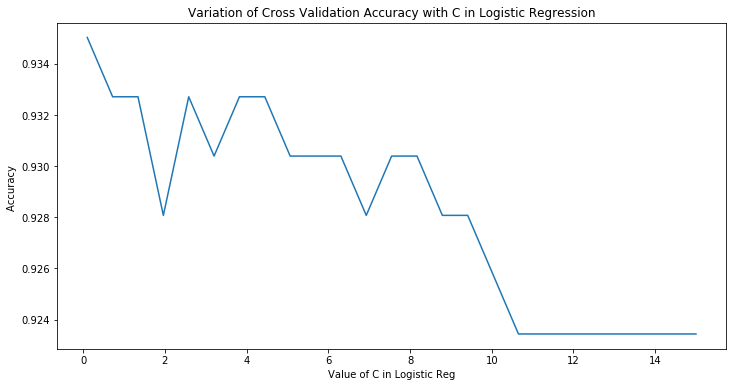

In [45]:
#one vs one classifier
print(len(x_train1v1),len(y_train1v1),len(x_test1v1),len(y_test1v1))
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
x_train1v1p=[]
x_test1v1p=[]
for i in range(0,len(x_train1v1)):
    x_train1v1p.append(x_train1v1[i][4])
for i in range(0,len(x_test1v1)):
    x_test1v1p.append(x_test1v1[i][4])
accs=[]
C_arr=np.linspace(.1,15,25)
best_C=1
max_score=0
for C_log in C_arr:
    acc=0
    ovc=OneVsOneClassifier(LogisticRegression(penalty='l2',C=C_log))
    multilabel_testerr=ovc.fit(x_train1v1p,y_train1v1).score(x_test1v1p,y_test1v1)
    acc+=multilabel_testerr
    accs.append(acc)
    if acc>max_score:
        max_score=acc
        best_C=C_svm
    print('One vs One Multilabel Classifier Score :',multilabel_testerr)
plt.figure(figsize=(12,6))
plt.plot(C_arr,accs)
plt.xlabel('Value of C in Logistic Reg')
plt.ylabel('Accuracy ')
plt.title('Variation of Cross Validation Accuracy with C in Logistic Regression')
plt.savefig("log_C.jpg",bbox_inches='tight')
plt.show()

In [42]:
#one vs one classifier
print(len(x_train1v1),len(y_train1v1),len(x_test1v1),len(y_test1v1))
from sklearn.multiclass import OneVsOneClassifier
x_train1v1p=[]
x_test1v1p=[]
for i in range(0,len(x_train1v1)):
    x_train1v1p.append(x_train1v1[i][4])
for i in range(0,len(x_test1v1)):
    x_test1v1p.append(x_test1v1[i][4])
accs=[]
C_arr=np.linspace(.1,15,25)
best_C=1
max_score=0
for C_svm in C_arr:
    acc=0
    ovc=OneVsOneClassifier(SVC(gamma='auto',kernel='rbf',C=C_svm))
    multilabel_testerr=ovc.fit(x_train1v1p,y_train1v1).score(x_test1v1p,y_test1v1)
    acc+=multilabel_testerr
    accs.append(acc)
    if acc>max_score:
        max_score=acc
        best_C=C_svm
    print('One vs One Multilabel Classifier Score :',multilabel_testerr)

360 360 431 431
One vs One Multilabel Classifier Score : 0.559164733179
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.92343387471
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier Score : 0.921113689095
One vs One Multilabel Classifier 

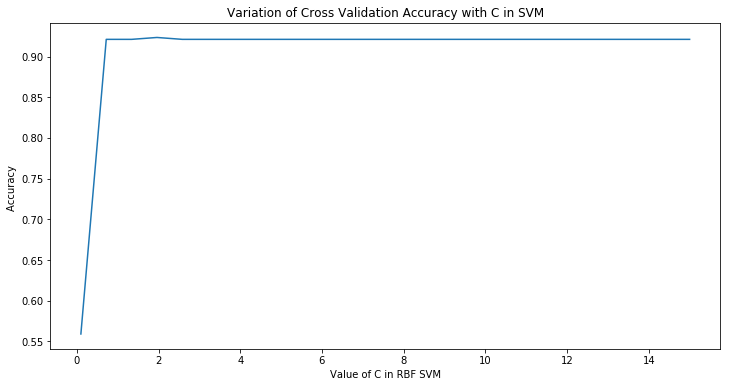

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(C_arr,accs)
plt.xlabel('Value of C in RBF SVM')
plt.ylabel('Accuracy ')
plt.title('Variation of Cross Validation Accuracy with C in SVM')
plt.savefig("svm_C_rbf.jpg",bbox_inches='tight')
plt.show()

In [40]:
#one vs one classifier
print(len(x_train1v1),len(y_train1v1),len(x_test1v1),len(y_test1v1))
from sklearn.multiclass import OneVsOneClassifier
x_train1v1p=[]
x_test1v1p=[]
for i in range(0,len(x_train1v1)):
    x_train1v1p.append(x_train1v1[i][4])
for i in range(0,len(x_test1v1)):
    x_test1v1p.append(x_test1v1[i][4])
accs=[]
C_arr=np.linspace(.1,5,25)
best_C=1
max_score=0
for C_svm in C_arr:
    acc=0
    ovc=OneVsOneClassifier(SVC(gamma='auto',kernel='linear',C=C_svm))
    multilabel_testerr=ovc.fit(x_train1v1p,y_train1v1).score(x_test1v1p,y_test1v1)
    acc+=multilabel_testerr
    accs.append(acc)
    if acc>max_score:
        max_score=acc
        best_C=C_svm
    print('One vs One Multilabel Classifier Score :',multilabel_testerr)

360 360 431 431
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier Score : 0.916473317865
One vs One Multilabel Classifier

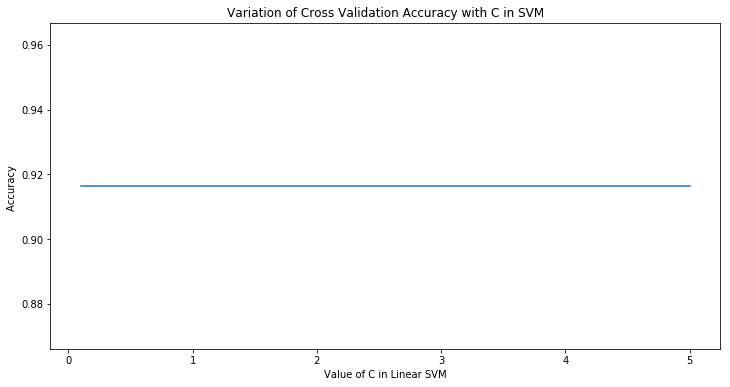

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(C_arr,accs)
plt.xlabel('Value of C in Linear SVM')
plt.ylabel('Accuracy ')
plt.title('Variation of Cross Validation Accuracy with C in SVM')
plt.savefig("svm_C_lin.jpg",bbox_inches='tight')
plt.show()

In [21]:
#One vs One for each Label

score=[]
enc={0:'spheroidite',1:'network',2:'pearlite',3:'spheroidite+widmanstatten',4:'pearlite+spheroidite',5:'pearlite+widmanstatten',6:'martensite'}

x_test=[]
y_test=[]
for i in range(len(x_i)):
    if y[i]==0:
        x_test.append(feat[x_i[i]][4])
        y_test.append(0)
score.append(ovc.fit(x_train1v1p,y_train1v1).score(x_test,y_test))
print('For Micrograph Type',enc[0])
print('OnevsOne has Test score:',score[0])
x_test=[]
y_test=[]
for i in range(len(x_i)):
    if y[i]==1:
        x_test.append(feat[x_i[i]][4])
        y_test.append(1)
score.append(ovc.fit(x_train1v1p,y_train1v1).score(x_test,y_test))
print('For Micrograph Type',enc[1])
print('OnevsOne has Test score:',score[1])
x_test=[]
y_test=[]
for i in range(len(x_i)):
    if y[i]==2:
        x_test.append(feat[x_i[i]][4])
        y_test.append(2)
score.append(ovc.fit(x_train1v1p,y_train1v1).score(x_test,y_test))
print('For Micrograph Type',enc[2])
print('OnevsOne has Test score:',score[2])
x_test=[]
y_test=[]
for i in range(len(x_i)):
    if y[i]==3:
        x_test.append(feat[x_i[i]][4])
        y_test.append(3)
score.append(ovc.fit(x_train1v1p,y_train1v1).score(x_test,y_test))
print('For Micrograph Type',enc[3])
print('OnevsOne has Test score:',score[3])

For Micrograph Type spheroidite
OnevsOne has Test score: 0.967914438503
For Micrograph Type network
OnevsOne has Test score: 0.948113207547
For Micrograph Type pearlite
OnevsOne has Test score: 1.0
For Micrograph Type spheroidite+widmanstatten
OnevsOne has Test score: 0.876543209877


In [22]:
#apply multilabel classifier for pearlite and widmanstatten and pearlite and widmanstatten samples
x_test=[]
y_test=[]
enc={0:'spheroidite',1:'network',2:'pearlite',3:'spheroidite+widmanstatten',4:'pearlite+spheroidite',5:'pearlite+widmanstatten',6:'martensite'}

for i in range(len(x_i)):
    if y[i]==4:
        x_test.append(feat[x_i[i]][4])
        y_test.append(4)
pred1=[]
for i in range(len(x_test)):
    pred1.append(ovc.fit(x_train1v1p,y_train1v1).predict(x_test))
print('Micrograph Type:',enc[4])
for i in range(0,len(pred1[0])):
    print ('Micrograph Image',i)
    print ('One vs One Predicted:',enc[pred1[0][i]])
x_test=[]
y_test=[]
for i in range(len(x_i)):
    if y[i]==5:
        x_test.append(feat[x_i[i]][4])
        y_test.append(5)
pred2=[]
for i in range(len(x_test)):
    pred2.append(ovc.fit(x_train1v1p,y_train1v1).predict(x_test))
print('Micrograph Type:',enc[5])
for i in range(0,len(pred2[0])):
    print ('Micrograph Image',i)
    print ('One vs One Predicted:',enc[pred2[0][i]])

Micrograph Type: pearlite+spheroidite
Micrograph Image 0
One vs One Predicted: spheroidite
Micrograph Image 1
One vs One Predicted: spheroidite
Micrograph Image 2
One vs One Predicted: spheroidite
Micrograph Image 3
One vs One Predicted: pearlite
Micrograph Image 4
One vs One Predicted: spheroidite
Micrograph Image 5
One vs One Predicted: spheroidite
Micrograph Image 6
One vs One Predicted: spheroidite
Micrograph Image 7
One vs One Predicted: spheroidite
Micrograph Image 8
One vs One Predicted: spheroidite
Micrograph Image 9
One vs One Predicted: pearlite
Micrograph Image 10
One vs One Predicted: spheroidite
Micrograph Image 11
One vs One Predicted: spheroidite
Micrograph Image 12
One vs One Predicted: spheroidite
Micrograph Image 13
One vs One Predicted: spheroidite
Micrograph Image 14
One vs One Predicted: spheroidite
Micrograph Image 15
One vs One Predicted: spheroidite
Micrograph Image 16
One vs One Predicted: spheroidite
Micrograph Image 17
One vs One Predicted: spheroidite
Microg

In [23]:
print(pred2[0])
print(pred1[0])

[2 2 2 0 3 2 0 2 0 0 2 2 2 0 0 2 2 2 0 3 2 2 2 3 2 0 2]
[0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 2 0 2 0 2 2 0 0 0 0 0 3 0 2 0 0 2 0 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 0 2 0 0 0 0 0 2 2 0 0 2 0 2 0 0 2 0 0 2 0 0 0 2 0 0 1]


In [24]:
#Part D
# Now we want to apply the pairwise classifier pearlite vs spheroidite to the mixed pearlite vs spheroidite micrographs
x_test=[]
y_test=[]
print (combs)
for i in range(len(x_i)):
    if y[i]==4:
        x_test.append(feat[x_i[i]][4])
        y_test.append(4)
pred3=[]
for i in range(len(x_test)):
    pred3.append(models[1].predict(x_test))
print(enc[4])
for i in range(0,len(pred3[0])):
    print ('Micrograph Image',i)
    print ('Pairwise Classifier Predicted:',enc[pred3[0][i]])
    print ('OnevsOne Classifier Predicted:',enc[pred1[0][i]])

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
pearlite+spheroidite
Micrograph Image 0
Pairwise Classifier Predicted: spheroidite
OnevsOne Classifier Predicted: spheroidite
Micrograph Image 1
Pairwise Classifier Predicted: spheroidite
OnevsOne Classifier Predicted: spheroidite
Micrograph Image 2
Pairwise Classifier Predicted: spheroidite
OnevsOne Classifier Predicted: spheroidite
Micrograph Image 3
Pairwise Classifier Predicted: pearlite
OnevsOne Classifier Predicted: pearlite
Micrograph Image 4
Pairwise Classifier Predicted: spheroidite
OnevsOne Classifier Predicted: spheroidite
Micrograph Image 5
Pairwise Classifier Predicted: spheroidite
OnevsOne Classifier Predicted: spheroidite
Micrograph Image 6
Pairwise Classifier Predicted: spheroidite
OnevsOne Classifier Predicted: spheroidite
Micrograph Image 7
Pairwise Classifier Predicted: spheroidite
OnevsOne Classifier Predicted: spheroidite
Micrograph Image 8
Pairwise Classifier Predicted: spheroidite
OnevsOne Classifier Predicted: sph

In [25]:
#Part E predict on martensite
x_test=[]
y_test=[]
for i in range(len(x_i)):
    if y[i]==6:
        x_test.append(feat[x_i[i]][4])
        y_test.append(6)
pred4=[]
for i in range(len(x_test)):
    pred4.append(ovc.fit(x_train1v1p,y_train1v1).predict(x_test))
print(enc[6])
for i in range(0,len(pred4[0])):
    print ('Micrograph Image',i,'Predicted:',enc[pred4[0][i]])

martensite
Micrograph Image 0 Predicted: spheroidite
Micrograph Image 1 Predicted: network
Micrograph Image 2 Predicted: pearlite
Micrograph Image 3 Predicted: spheroidite
Micrograph Image 4 Predicted: spheroidite
Micrograph Image 5 Predicted: network
Micrograph Image 6 Predicted: spheroidite
Micrograph Image 7 Predicted: pearlite
Micrograph Image 8 Predicted: spheroidite
Micrograph Image 9 Predicted: spheroidite
Micrograph Image 10 Predicted: pearlite
Micrograph Image 11 Predicted: pearlite
Micrograph Image 12 Predicted: pearlite
Micrograph Image 13 Predicted: pearlite
Micrograph Image 14 Predicted: spheroidite
Micrograph Image 15 Predicted: pearlite
Micrograph Image 16 Predicted: spheroidite
Micrograph Image 17 Predicted: pearlite
Micrograph Image 18 Predicted: spheroidite
Micrograph Image 19 Predicted: pearlite
Micrograph Image 20 Predicted: pearlite
Micrograph Image 21 Predicted: spheroidite
Micrograph Image 22 Predicted: spheroidite
Micrograph Image 23 Predicted: pearlite
Microgra

In [26]:
print(pred4[0])

[0 1 2 0 0 1 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 0 2 2 2 0 0 2 1 0 0 2 0]
